In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def potential(x):
    U = np.zeros_like(x)
    pos = np.where(x > 1)
    U[pos] = U0
    return U

def equation(U, E, f):
    return (U - E)*f

def solver(psi, psi_prime, E):
    for i in range(1,N):
        psi_prime[i] = psi_prime[i-1] + equation(U[i-1], E, psi[i-1])*dx
        psi[i] = psi[i-1] + psi_prime[i]*dx
    return psi

def seeker(odd):
    functions = []
    energies = []
    E = 1
    value = 0.05
    for i in range(3):
        psi = np.ones(N)
        psi_prime = np.zeros(N)
        check = 1
        if odd:
            psi[0] = 0
            psi_prime[0] = 1
        if E > U0:
            break
        while check > value and E < U0:
            E += 0.01
            psi = solver(psi, psi_prime, E)
            check = abs(psi[500])
        if check < value:
            functions.append(psi)
            energies.append(E)
            E += 6
    return functions, energies

U0 = 100
N = 1001
dx = 0.003
x = np.linspace(0, (N-1)*dx, N)
U = potential(x)

In [3]:
odd, E_odd = seeker(True)
even, E_even = seeker(False)

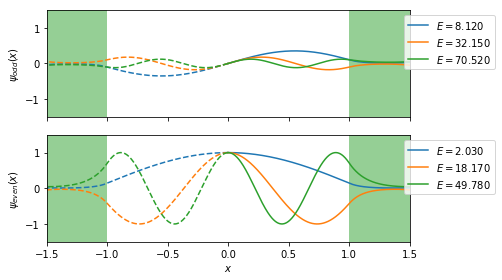

In [4]:
fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("$\psi_{odd}(x)$")
axes[1].set_ylabel("$\psi_{even}(x)$")
axes[1].set_xlabel("$x$")
for i in range(3):
    parent = axes[0].plot(x, odd[i], label = "$E = %.3f$"%E_odd[i])[0]
    axes[0].plot(-x, -odd[i], "--", c=parent.get_color())
    parent = axes[1].plot(x, even[i], label = "$E = %.3f$"%E_even[i])[0]
    axes[1].plot(-x, even[i], "--", c=parent.get_color())
for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axvspan(-1.0, -1.5, facecolor='#2ca02c', alpha=0.5)
    ax.axvspan(1.0, 1.5, facecolor='#2ca02c', alpha=0.5)
    extra = ax.legend(loc=1, bbox_to_anchor=(1.25, 1.0))
plt.tight_layout()
fig.savefig("finite-box.pdf", bbox_extra_artists=(extra,), bbox_inches='tight')

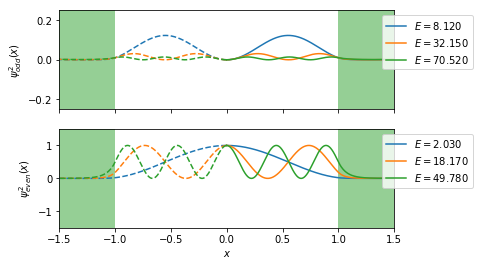

In [10]:
fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("$\psi^2_{odd}(x)$")
axes[1].set_ylabel("$\psi^2_{even}(x)$")
axes[1].set_xlabel("$x$")
for i in range(3):
    parent = axes[0].plot(x, odd[i]**2, label = "$E = %.3f$"%E_odd[i])[0]
    axes[0].plot(-x, odd[i]**2, "--", c=parent.get_color())
    parent = axes[1].plot(x, even[i]**2, label = "$E = %.3f$"%E_even[i])[0]
    axes[1].plot(-x, even[i]**2, "--", c=parent.get_color())
for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axvspan(-1.0, -1.5, facecolor='#2ca02c', alpha=0.5)
    ax.axvspan(1.0, 1.5, facecolor='#2ca02c', alpha=0.5)
    extra = ax.legend(loc=1, bbox_to_anchor=(1.25, 1.0))
axes[0].set_ylim(-0.25, 0.25)
fig.savefig("psi-squared.pdf", bbox_extra_artists=(extra,), bbox_inches='tight')

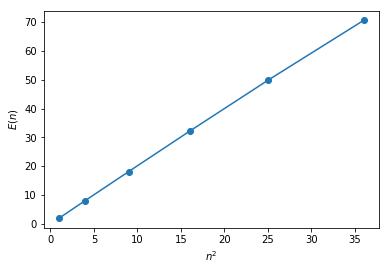

In [38]:
E = sorted(E_odd + E_even)
n = np.arange(1, 1 + len(E))**2
plt.plot(n, E, "-o")
plt.ylabel("$E(n)$")
plt.xlabel("$n^2$")
plt.savefig("energy.pdf")

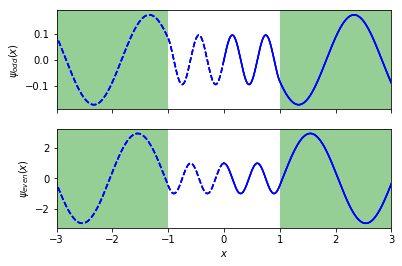

In [58]:
E = 110
psi = np.ones(N)
psi_prime = np.zeros(N)
even = solver(psi, psi_prime, E)
psi = np.zeros(N)
psi_prime = np.ones(N)
odd = solver(psi, psi_prime, E)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("$\psi_{odd}(x)$")
axes[1].set_ylabel("$\psi_{even}(x)$")
axes[1].set_xlabel("$x$")
for i in range(3):
    axes[0].plot(x, odd, c="b")
    axes[0].plot(-x, -odd, "--", c="b")
    axes[1].plot(x, even, c="b")
    axes[1].plot(-x, even, "--", c="b")
for ax in axes:
    ax.axvspan(-1.0, -3, facecolor='#2ca02c', alpha=0.5)
    ax.axvspan(1.0, 3, facecolor='#2ca02c', alpha=0.5)
    ax.set_xlim(-3, 3)
fig.savefig("greater.pdf", bbox_extra_artists=(extra,), bbox_inches='tight')